# Santander: predicting customer satisfaction

## Part1: Exploratory Analysis and pre processing

In this job, we have to predict if a Santander customer will be satisfied (1) or unsatisfied (0), given 369 features collected.

#### Feature information:

1. ID: customer ID
2. 369 features (their names are not very didactic, it is not so easy to study them particularly)
3. TARGET: satisfaction output (1 = Yes, 0 = No)

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing training dataset
dftrain = pd.read_csv('train.csv')
dftrain.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
print(dftrain.ftypes)
print(dftrain.shape)

ID                                 int64:dense
var3                               int64:dense
var15                              int64:dense
imp_ent_var16_ult1               float64:dense
imp_op_var39_comer_ult1          float64:dense
imp_op_var39_comer_ult3          float64:dense
imp_op_var40_comer_ult1          float64:dense
imp_op_var40_comer_ult3          float64:dense
imp_op_var40_efect_ult1          float64:dense
imp_op_var40_efect_ult3          float64:dense
imp_op_var40_ult1                float64:dense
imp_op_var41_comer_ult1          float64:dense
imp_op_var41_comer_ult3          float64:dense
imp_op_var41_efect_ult1          float64:dense
imp_op_var41_efect_ult3          float64:dense
imp_op_var41_ult1                float64:dense
imp_op_var39_efect_ult1          float64:dense
imp_op_var39_efect_ult3          float64:dense
imp_op_var39_ult1                float64:dense
imp_sal_var16_ult1               float64:dense
ind_var1_0                         int64:dense
ind_var1     

In [4]:
dftrain[['ID', 'TARGET']].groupby('TARGET').count()

,ID
TARGET,
0,73012
1,3008


We can see two issues here: high dimensionality and imbalanced classes. Let's first treat the classes problem.

We have performed the majority class under sampling, using the package RandomUnderSampler from imblearn:

In [5]:
from imblearn.under_sampling import RandomUnderSampler

dftrain.fillna(0)

X_nt = dftrain.iloc[:, :370].values
Y_nt = dftrain.iloc[:, 370]

cc = RandomUnderSampler(random_state=0)
X_res, Y_res = cc.fit_resample(X_nt, Y_nt)

# Show new distribution
colunas = dftrain.iloc[:, :370].columns
dftrain1 = pd.DataFrame(X_res, columns=colunas)
dftrain1['TARGET'] = Y_res
dftrain1[['ID', 'TARGET']].groupby('TARGET').count()

C:\Users\593477\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,ID
TARGET,
0,3008
1,3008


Now the dimensionality issue. Here we used RFE with a Logistic Regression estimator to extract half of the features (184):

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE fit
rfe_fit = RFE(estimator=LogisticRegression()).fit(X_res, Y_res)

# Extracting selected features
dfcheck = pd.DataFrame(data=rfe_fit.ranking_, columns=['rank'])
dfcheck.reset_index
dfcheck['feature'] = dftrain1.iloc[:, :370].columns
col = dfcheck[dfcheck['rank'] == 1]['feature']

In [10]:
# Final training data in a dataframe
dftrain2 = dftrain1[col]
dftrain2[['TARGET']] = dftrain1[['TARGET']]
dftrain2.dtypes

ID                               float64
var3                             float64
var15                            float64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var5_0                       float64
ind_var5                         float64
ind_var8_0                       float64
ind_var8                         float64
ind_var12_0     

## Part 2: Machine Learning: model selection and tuning with training data

In [11]:
# Importing sklearn modules
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
# Exrtacting training data
dftrain3 = dftrain2.iloc[:, 1:185]
X_train = dftrain3.values
Y_train = dftrain2['TARGET']

LR: 0.171 (0.176)
LDA: 0.667 (0.043)
KNN: 0.541 (0.030)
NB: 0.540 (0.446)
DTC: 0.627 (0.024)
SVC: 0.137 (0.043)
XGB: 0.709 (0.024)
RDF: 0.672 (0.053)
KME: 0.291 (0.321)


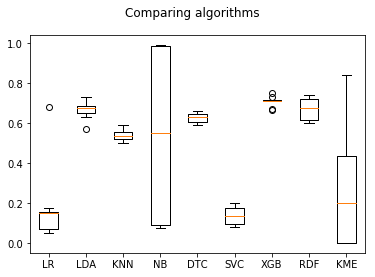

In [17]:
# Cross validation to select the most suitable classification model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('KME', KMeans()))

# Applying models on training dataset and evaluating their accuracy
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_val_result = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cross_val_result)
    names.append(name)
    
    text = '%s: %.3f (%.3f)' % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

fig = plt.figure()
fig.suptitle('Comparing algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Extreme Gradient Boosting has showed itself the most suitable model to the training data set (70.9% average accuracy); Let's tune it using GridSearch

In [18]:
# Using GridSearch to optimize selected model parameters

# Defining values for parameters:
n_estim = [100, 500, 1000]
l_rate = [0.1, 0.5, 1.0]
m_dep = [1, 2, 3]
values_grid = dict(n_estimators = n_estim, learning_rate = l_rate, max_depth = m_dep)

# Creating model
model = GradientBoostingClassifier()

# Testing parameters combinations
kfold = model_selection.KFold(n_splits=10, random_state=7)

grid = model_selection.GridSearchCV(estimator=model, param_grid=values_grid, 
                                    cv = kfold, scoring='accuracy', return_train_score=True)
grid_result = grid.fit(X_train, Y_train)

# Evaluating model tunning
mean_score = [mean for mean in grid_result.cv_results_['mean_test_score']]
std_score = [mean for mean in grid_result.cv_results_['std_test_score']]
params_score = [mean for mean in grid_result.cv_results_['params']]

# Output
print('Best accuracy: %.4f using %s' % (grid_result.best_score_, grid_result.best_params_), '\n')
i = 0
for param in params_score:
    print('%.4f (%.4f) with %r' % (mean_score[i], std_score[i], param))
    i = i + 1;

Best accuracy: 0.7141 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000} 

0.6968 (0.0247) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.7138 (0.0255) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
0.7141 (0.0273) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}
0.7083 (0.0258) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.7074 (0.0254) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
0.7006 (0.0270) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}
0.7088 (0.0244) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.7071 (0.0212) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.7011 (0.0245) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
0.7108 (0.0309) with {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 100}
0.7078 (0.0334) with {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 500}
0.7096 (0.0312)

In [19]:
# Updating model parameters
model_fit = GradientBoostingClassifier(n_estimators=1000,
                                      learning_rate=0.1,
                                      max_depth=1).fit(X_train, Y_train)

Now let's test the tuned model directly on the training dataset; we achieve an accuracy of 78.2%

In [20]:
Y_pred = model_fit.predict(X_train)

print(classification_report(y_pred=Y_pred, y_true=Y_train), '\n')
print(confusion_matrix(y_true=Y_train, y_pred=Y_pred), '\n')
print(accuracy_score(y_true=Y_train, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.78      0.78      0.78      3008
          1       0.78      0.78      0.78      3008

avg / total       0.78      0.78      0.78      6016
 

[[2345  663]
 [ 647 2361]] 

0.7822473404255319


## Part 3: Deploying ML process on the test dataset and submit

In [21]:
# Importing and viewing test dataset
dftest = pd.read_csv('test.csv')
dftest.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [23]:
# applying all pre processing stages perfomed briefly
dftest.fillna(0)
X_test = dftest[col].iloc[:, 1:].values
Y_test = model_fit.predict(X_test)
print(X_test.shape)
print(Y_test.shape)

(75818, 184)
(75818,)


In [25]:
# Viewing results
dftest['TARGET'] = Y_test
dftest[['ID', 'TARGET']].groupby('TARGET').count()

,ID
TARGET,
0,55939
1,19879


In [27]:
# Submitting result to score
dftest.to_csv('sample_submission.csv', columns=['ID', 'TARGET'], index=False, header=True, encoding='utf-8')

On kaggle competition, this submission has scored 74.5% of accuracy

## End